In [97]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [98]:
os.makedirs('../plots', exist_ok=True)

In [99]:
# Config
sns.set_theme()

In [100]:
metadata = pd.read_csv('../data/maestro-v3.0.0/maestro-v3.0.0.csv')

In [101]:
metadata.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508


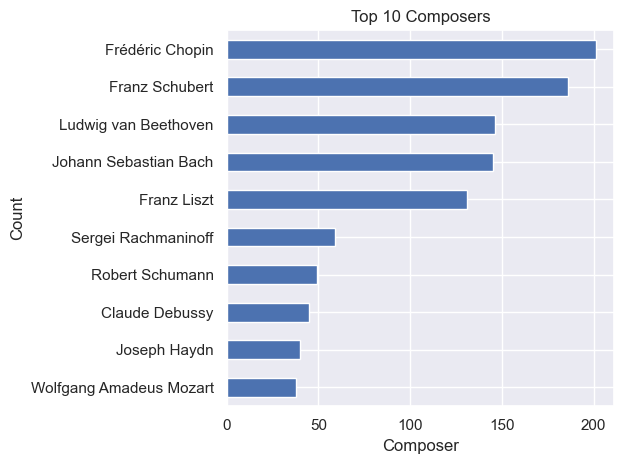

In [102]:
ax = metadata['canonical_composer'].value_counts().head(10).sort_values().plot(kind='barh')

ax.set_title('Top 10 Composers')
ax.set_ylabel('Count')
ax.set_xlabel('Composer')

plt.tight_layout()

plt.show()

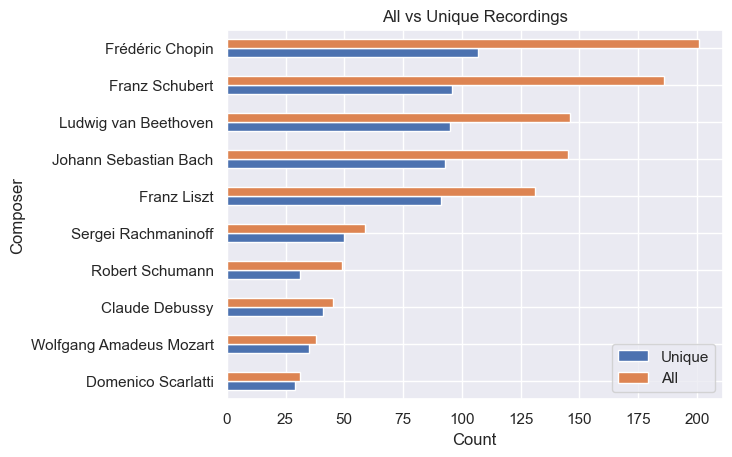

<Figure size 640x480 with 0 Axes>

In [103]:
metadata_dropped_duplicates = metadata.drop_duplicates(subset=['canonical_composer', 'canonical_title'])

series1 = metadata_dropped_duplicates['canonical_composer'].value_counts().dropna()
series2 = metadata['canonical_composer'].value_counts().dropna()

combined = pd.concat([series1, series2], axis=1, keys=['Unique', 'All']).fillna(0).head(10)

combined = combined.sort_values(by='All')

ax = combined.plot(kind='barh')

ax.set_title('All vs Unique Recordings')
ax.set_xlabel('Count')
ax.set_ylabel('Composer')

plt.savefig('../plots/composers.png')
plt.show()